In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os, logging, scipy, re, random
import numpy as np
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
from sklearn.model_selection import train_test_split
import IPython.display as ipd
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import soundfile as sf
import librosa, librosa.display
from librosa.feature import zero_crossing_rate, mfcc, spectral_centroid, spectral_rolloff, spectral_bandwidth, chroma_cens, rms
from pathlib import Path
from pydub import AudioSegment, effects  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, make_scorer
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline, Pipeline


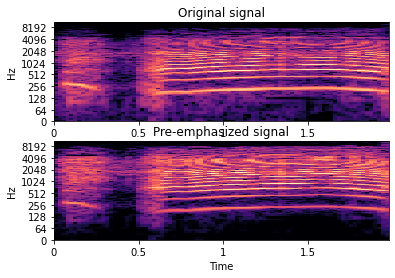

In [ ]:
# y, sr = librosa.load('', sr=44100, mono=True, duration=1)
# y_filt = librosa.effects.preemphasis(y)
# # and plot the results for comparison
# S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
# S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max)
# fig, (ax1, ax2) = plt.subplots(2)
# librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax1)
# ax1.set_title('Original signal')
# librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax2)
# ax2.set_title('Pre-emphasized signal')
# plt.show()

In [2]:
class FeatureExtraction:
    '''
    Extract important feature
    '''
    RATE = 44100 #44.1kHz
    FRAME = 512 #frame size

    def __init__(self, label=None):
        if label is None:
            self.label =''
        else:
            self.label = label
    
    def feature_extraction(self, data):
        '''
        Using librosa.feature
        Signal will be cut into frames then features are computed for each of these frame and get average of it
        return a Np array which is transformed into a data fram with named columns
        
        '''
        zero_crossing = self.compute_librosa_features(data=data, feature = 'zero_crossing_rate' )
        rmse = self.compute_librosa_features(data=data,feature = 'rmse')
        mfcc = self. compute_librosa_features(data=data, feature='mfcc')
        centroid = self.compute_librosa_features(data=data, feature='centroid')
        rolloff = self.compute_librosa_features(data=data, feature='rolloff')
        bandwidth = self.compute_librosa_features(data=data, feature='bandwidth')
        concat_features = np.concatenate((zero_crossing,
                                          rmse,
                                          mfcc,
                                          centroid,
                                          rolloff,
                                          bandwidth),
                                          axis=0)
        
        logging.info('Processing average...')
        mean_features = np.mean(concat_features, axis=1, keepdims=True).transpose()
        logging.info('Complete')
        return mean_features, self.label

    def compute_librosa_features(self, data, feature):
        '''
        Computing features with librosa
        return a np array
        '''
        logging.info(f'Computing {feature}...')
        if feature == 'zero_crossing_rate':
            return zero_crossing_rate(y=data, hop_length=self.FRAME)
   
        elif feature == 'rmse':
            return rms(y=data, hop_length=self.FRAME)
  
        elif feature == 'mfcc':
            return mfcc(y=audio_data, sr=self.RATE, n_mfcc=13)

        elif feature == 'centroid':
            return spectral_centroid(y=data, sr=self.RATE, hop_length=self.FRAME)

        elif feature == 'rolloff':
            return spectral_rolloff(y=data, sr=self.RATE, hop_length=self.FRAME, roll_percent=0.9)
            
        elif feature == 'bandwidth':
            return spectral_bandwidth(y=data, sr=self.RATE, hop_length=self.FRAME)


In [6]:
from sklearn.preprocessing import normalize

path = './wav_data'
    
dir_list = [x for x in os.listdir(path)]

# initialize empty array for features
# X = np.empty([1, 18])
X = []
# initialise empty array for labels
y = []

logging.info('Creating training set...')
# start = timeit.default_timer()s

# iteration on sub-folders
for directory in dir_list:
    path
    # Instantiate FeatureEngineer'
    feature_extraction = FeatureExtraction(label=directory)

    file_list = os.listdir(os.path.join(path, directory))

    # iteration on audio files in each sub-folder
    
    for audio_file in file_list:
        try:
            # print(f'start: {file_path}')
            file_path = os.path.join(path, directory, audio_file)
            audio_data, sr = librosa.load(file_path, sr=44100, mono=True, duration=3)
            mean_features, label = feature_extraction.feature_extraction(data=audio_data)
            X.append(mean_features)
            y.append(label)
            # print (file_path, len(X), len(y))
            # print('-'*10)
        except:
            print('ERROR')

X = np.array(X)
X = np.squeeze(X)

y = np.array(y)


In [3]:
scaler = MinMaxScaler()
X_transform= scaler.fit_transform(X)
le =LabelEncoder()
y = le.fit_transform(y)


NameError: name 'X' is not defined

In [ ]:
#without labelencoder
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.15, random_state=48, stratify=y)
print(X_train.shape,X_test.shape)

# **KNN**


In [425]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 0.6923076923076923


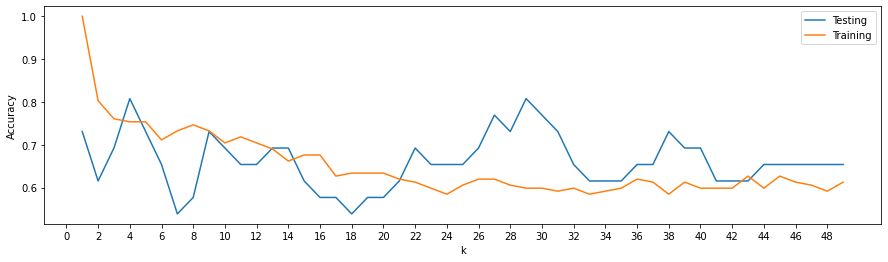

In [20]:
train_score = []
test_score = []
for i in range (1,50):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
k = np.arange(1,50)
plt.figure (figsize=(15,4))
plt.plot(k, test_score, label='Testing')
plt.plot(k, train_score, label='Training')
plt.legend()
plt.xlabel('k')
plt.xticks(np.arange(50, step =2))
plt.ylabel('Accuracy')
plt.show()


In [21]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(X_train, y_train)
pred1 = knn1.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, pred1)))

accuracy: 0.8076923076923077


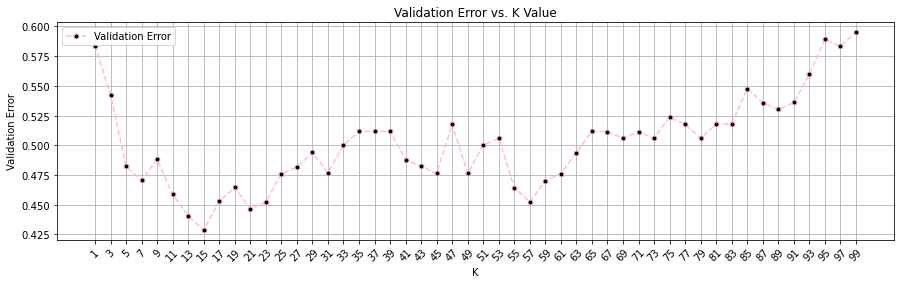

In [23]:
val_error_rate = []
# hyperparameters
neighbors_range = range(1,100,2) 

for i in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    val_error = 1 - cross_val_score(knn, X, y, cv=5).mean() 
    val_error_rate.append(val_error)
    
plt.figure(figsize=(15,4))
plt.plot(neighbors_range, val_error_rate, color='pink', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=45)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [26]:
knn2 = KNeighborsClassifier(n_neighbors=15)
knn2.fit(X_train, y_train)
pred2 = knn2.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, pred2)))

accuracy: 0.6153846153846154


In [29]:
k_range = list(range(1,50))
weight_options = ["uniform", "distance"]

param = dict(n_neighbors = k_range, weights = weight_options)

grid = GridSearchCV(knn, param, cv = 10, scoring='accuracy',n_jobs=-1,verbose=1)
grid.fit(X,y)


print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Fitting 10 folds for each of 98 candidates, totalling 980 fits
0.6375
{'n_neighbors': 10, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=10, weights='distance')


In [495]:
knn3 = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn3.fit(X_train,y_train)
pred3 = knn3.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, pred3)))

accuracy: 0.7692307692307693


In [494]:
param = dict(n_neighbors = k_range, weights = weight_options, leaf_size=[10, 20,30,40,45,50, 60])
knn_rand = RandomizedSearchCV(knn, param, cv=10, scoring='accuracy', n_iter=50, random_state=5)

knn_rand.fit(X, y)
print (knn_rand.best_score_)
print (knn_rand.best_params_)
print (knn_rand.best_estimator_)

0.6345588235294117
{'weights': 'distance', 'n_neighbors': 10, 'leaf_size': 20}
KNeighborsClassifier(leaf_size=20, n_neighbors=10, weights='distance')


In [496]:
knn4 = KNeighborsClassifier(leaf_size=20, n_neighbors=10, weights='distance')
knn4.fit(X_train,y_train)
pred4 = knn4.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, pred4)))

accuracy: 0.7692307692307693


# Random forest

In [46]:
rfc_model = RandomForestClassifier(random_state=1)

In [ ]:
#GRIDSEARCH CV WITH LABEL ENCODER 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
rf_gscv = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# train the grid search meta-estimator to find the best model
model = rf_gscv.fit(X, y)



Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 59.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 71.7min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 85.2min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 100.7min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 116.7min
[Parallel(n_jobs=-1)]: Done 11242 tasks     

AttributeError: ignored

In [ ]:
print (rf_gscv.best_score_)
print (rf_gscv.best_params_)
print (rf_gscv.best_estimator_)
print(rf_gscv.best_estimator_.get_params())

0.0714795008912656
{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_es

In [497]:
#USE RESULT ABOVE TO FIT IN SET WITHOUT LABEL ENCODER
rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False).fit(X_train, y_train)

pred = rfc.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 0.7307692307692307


##Randomized search

In [499]:
#RANDOMIZE SEARCH ON LABELENCODER
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 5000, num = 10)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 51, num = 5)]
max_depth.append(None)
criterion = ['gini', 'entropy']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# set up grid search meta-estimator
rf_rscv = RandomizedSearchCV(rfc_model, rf_params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# train the grid search meta-estimator to find the best model
model = rf_rscv.fit(X, y)

# print winning set of hyperparameters
print (rf_rscv.best_score_)
print (rf_rscv.best_params_)
print (rf_rscv.best_estimator_)
print(rf_rscv.best_estimator_.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.5866310160427808
{'n_estimators': 2800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=2800, random_state=1)
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2800, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [ ]:
RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=3350,
                       random_state=1)

In [429]:
rfc3=RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=600, random_state=1).fit(X_train, y_train)

pred_rfc3 = rfc3.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, pred_rfc3)))

accuracy: 0.6923076923076923


In [53]:
#BEST MODEL
rfc4= RandomForestClassifier(criterion='gini', 
                             max_depth=30, 
                             max_features='sqrt',
                             min_samples_leaf=1, 
                             min_samples_split=5,
                             n_estimators=3900,
                             bootstrap = True,
                             random_state=1, verbose=0).fit(X_train,y_train)

pred_rfc4 = rfc4.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, pred_rfc4)))
#73%

accuracy: 0.6923076923076923


In [26]:
fine_params = dict (criterion =['gini'], 
                    max_depth=[25,30,35,40,45,55,50,60],
                    max_features=['sqrt'],
                    min_samples_leaf=[1,2,3,4,5],
                    min_samples_split=[3,4,5],
                    n_estimators=[2000, 2500, 3900, 4500],
                    bootstrap = [True])
rf_model = RandomForestClassifier(random_state=1)
rf_gscv1 = GridSearchCV(rf_model, fine_params, cv=5, n_jobs=1, verbose=2, scoring='accuracy')

# train the grid search meta-estimator to find the best model
model = rf_gscv1.fit(X, y)

# print winning set of hyperparameters
print (rf_gscv1.best_score_)
print (rf_gscv1.best_params_)
print (rf_gscv1.best_estimator_)
print(rf_gscv1.best_estimator_.get_params())

e, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=3900; total time=   9.1s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=4500; total time=  10.0s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=4500; total time=   9.9s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=4500; total time=  10.0s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=4500; total time=   9.3s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=4500; total time=   8.8s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_sample

In [430]:
rclf= RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=3, n_estimators=4500, random_state=1).fit(X_train, y_train)

pred_rclf = rclf.predict(X_test)
print("accuracy: {}".format(accuracy_score(y_test, pred_rclf)))

accuracy: 0.6923076923076923


In [220]:
def evaluate(best_model):
  '''
  Input model = gridsearch/randomsearch of the model to print out the best parameters and accuracy
'''
  best = best_model.best_estimator_
  model = best.fit(X_train, y_train)
  predictions = best.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  f1_score = f1_score(y_test, prediction)
  return [accuracy, best];
  # print(f'Accuracy on test set: {(accuracy*100):.2f}%\n with following model: {best}')

  # return accuracy

# SVC

In [222]:
def accuracy(model_name):
    model = model_name.fit(X_train, y_train)
    accuracy = model.score(X_test,y_test)
   
    return f'Accuracy on test set: {(accuracy*100):.2f}%'

In [197]:
svc_params = {'kernel': [ 'poly', 'rbf'],
          'degree': np.linspace(2,5,4),
          'C': [1,10,100,300,500,1000],
          'gamma': [1, 0.1, 0.001, 0.0001]}
svc = SVC()
svc_rscv = RandomizedSearchCV(svc,svc_params,refit = True, cv=5, n_jobs=1, verbose=2, scoring='accuracy')

svc_model = svc_rscv.fit(X, y)
check = evaluate(svc_rscv)
#############################################################
#Search for all params with accuracy : 70% for  finetuning
#############################################################
accuracy_list=[]
model_list ={}
for i in range(10):
    while check[0] > 0.65 and check[0] not in accuracy_list:
            svc_model = svc_rscv.fit(X, y)
            acc,model = evaluate(svc_rscv)
            accuracy_list.append(acc)
            model_list[model]=acc
         


 .......C=1000, degree=4.0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .......C=1000, degree=4.0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .......C=1000, degree=4.0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .......C=1000, degree=4.0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ..........C=500, degree=5.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..........C=500, degree=5.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..........C=500, degree=5.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..........C=500, degree=5.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..........C=500, degree=5.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=4.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=4.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=4.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=4.0

In [112]:
SVC(C=500, degree=4.0, gamma=0.1, kernel='poly') #84.62%
SVC(C=100, degree=3.0, gamma=0.1, kernel='poly') #92.31%
SVC(C=300, degree=3.0, gamma=0.001) #76.92%
SVC(C=10, degree=5.0, gamma=0.1) #88.46%
SVC(C=500, degree=4.0, gamma=0.001) #80.76


0.6128342245989306
{'kernel': 'rbf', 'gamma': 0.1, 'degree': 5.0, 'C': 10}
SVC(C=10, degree=5.0, gamma=0.1)
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 5.0, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [113]:
svc_params1 = {'kernel': [ 'poly', 'rbf'],
          'degree': np.linspace(2,5,4),
          'C': [100,200,300,500,1000],
          'gamma': [ 0.1, 0.001, 0.5,0.05]}
svc = SVC()
svc_gscv = GridSearchCV(svc,svc_params1,refit = True, cv=StratifiedKFold(n_splits=5), n_jobs=1, verbose=2, scoring='accuracy')


In [234]:
a= SVC(C=100, degree=2.0, gamma=0.1, kernel='poly').fit(X_train, y_train)
a.score(X_test, y_test)
p = a.predict(X_test)
f=f1_score(y_test, p, average='macro')
print (f)

0.9144444444444446


In [ ]:
65% SVC(C=100, degree=2.0, gamma=0.05)

In [198]:
model_list

{SVC(C=500, degree=3.0, gamma=0.001): 0.8076923076923077,
 SVC(C=500, degree=4.0, gamma=0.001): 0.8076923076923077,
 SVC(C=500, degree=2.0, gamma=0.001): 0.8076923076923077,
 SVC(C=300, degree=2.0, gamma=0.1, kernel='poly'): 0.9230769230769231,
 SVC(C=10, degree=3.0, gamma=0.1): 0.8846153846153846,
 SVC(C=100, degree=3.0, gamma=0.1, kernel='poly'): 0.9230769230769231,
 SVC(C=1000, degree=5.0, gamma=0.1, kernel='poly'): 0.8076923076923077,
 SVC(C=100, degree=5.0, gamma=0.1, kernel='poly'): 0.8846153846153846,
 SVC(C=500, degree=3.0, gamma=0.001): 0.8076923076923077,
 SVC(C=300, degree=5.0, gamma=0.001): 0.7692307692307693,
 SVC(C=100, degree=4.0, gamma=0.1): 0.9230769230769231,
 SVC(C=100, degree=2.0, gamma=0.1, kernel='poly'): 0.9230769230769231,
 SVC(C=300, degree=5.0, gamma=0.1, kernel='poly'): 0.8461538461538461,
 SVC(C=1000, degree=5.0, gamma=0.1, kernel='poly'): 0.8076923076923077,
 SVC(C=100, degree=4.0, gamma=1): 0.6538461538461539,
 SVC(C=1000, degree=3.0, gamma=0.001): 0.84615

In [218]:
svc_params2 = {
            'kernel': [ 'poly', 'rbf'],
          'degree': np.linspace(2,5,4),
          'C': [1,10,100,300,500,1000],
          'gamma': [ 1,0.1, 0.001]}

svc_gscv = GridSearchCV(svc,svc_params2,refit = True, cv=5, n_jobs=1, verbose=2, scoring=make_scorer(f1_score,average='macro'))
svc_model = svc_gscv.fit(X, y)
evaluate(svc_rscv)

D ........C=300, degree=5.0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ........C=300, degree=5.0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .........C=300, degree=5.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=300, degree=5.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=300, degree=5.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=300, degree=5.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=300, degree=5.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=500, degree=2.0, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=500, degree=2.0, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=500, degree=2.0, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=500, degree=2.0, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=500, degree=2.0, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=500, degree

[0.7307692307692307, SVC(C=10, degree=3.0, gamma=1)]

In [219]:
#Prediction
# [0.7307692307692307, SVC(C=10, degree=3.0, gamma=1)] average='micro'
f1_score = 0.73

AttributeError: 'SVC' object has no attribute 'f1_score'

In [10]:
# a= SVC(C=100, degree=2.0, gamma=0.1, kernel='poly', probability=True).fit(X_train, y_train)

# p = a.predict_proba([X_test[1]])
# # f=f1_score(y_test[1], p, average='macro')

In [509]:
p

array([[0.05201457, 0.15589471, 0.54320293, 0.12223958, 0.12664822]])

In [9]:
audio_data, sr = librosa.load('./wav_data/burp/011.wav', sr=44100, mono=True, duration=3)
mean_features, label = feature_extraction.feature_extraction(data=audio_data)
mean_features = np.array(mean_features)
mf  = np.squeeze(mean_features)

In [555]:
mf

array([ 1.37433481e-01,  9.35139662e-03, -4.62064877e+02,  7.56899029e+01,
       -5.30417760e+01,  2.78688118e+01, -5.12985573e+01,  3.34481073e+00,
       -2.36362907e+01, -1.04756525e+01, -2.42348101e+00,  6.52394267e+00,
       -1.67580623e+01, -1.08925528e+01, -3.47698697e+00,  4.70192738e+03,
        1.01940992e+04,  3.75730223e+03])

In [10]:
test = scaler.transform([mf])

In [545]:
test.shape

(1, 18)

In [12]:
a1= SVC(C=10, degree=3.0, gamma=1,probability=True).fit(X_transform,y)
prp= a1.predict_proba(test)
prp

array([[0.95084089, 0.00980895, 0.00548837, 0.0036545 , 0.03020729]])

In [546]:
a2= SVC(C=100, degree=2.0, gamma=0.1, kernel='poly', probability=True).fit(X_train, y_train)
pr = a2.predict_proba([x[0]])
pr

array([[0.00325999, 0.06401301, 0.10448396, 0.81470377, 0.01353927]])

In [277]:
pipeline = Pipeline([('minmax_scaler', MinMaxScaler()),
                    ('SVC',SVC(C=10, degree=3.0, gamma=1, probability= True))
    ])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('SVC', SVC(C=10, degree=3.0, gamma=1, probability=True))])

In [529]:
clf = make_pipeline(MinMaxScaler(), SVC(C=10, degree=3.0, gamma=1, probability= True))
clf.fit(X, y)
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=10, degree=3.0, gamma=1, probability= True))])

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=10, degree=3.0, gamma=1, probability=True))])

In [530]:
import joblib
joblib.dump(pipeline, 'svc.pkl')


['svc.pkl']

In [473]:
def load_model(path):
    model = joblib.load(path)
    return model

pipeline = load_model('svc.pkl')

def preprocess_input(path):
    audio_data, sr = librosa.load(path, sr=44100, mono=True, duration=3)
    mean_features, label = feature_extraction.feature_extraction(data=audio_data)
    mean_features = np.array(mean_features)
    mean_features  = np.squeeze(mean_features)

    return mean_features

In [531]:

audio_data, sr = librosa.load('recorded1.wav', sr=44100, mono=True, duration=3)
mean_features, label = feature_extraction.feature_extraction(data=audio_data)
x = np.array(mean_features)
x = np.squeeze(mean_features)


In [536]:
s =SVC(C=10, degree=3.0, gamma=1, probability= True).fit(X_train, y_train)
p = s.predict_proba([x])
p

array([[0.13041504, 0.09515947, 0.14468104, 0.3976276 , 0.23211685]])

{'burp': 0, 'hungry': 1, 'lowerwindpain': 2, 'tired': 3, 'uncomfortable': 4}
4
